# Pràctica 1: Resolem un problema de classificacio

## Objectius

Els objectius d'aquesta pràctica són:

* Aplicar els coneixements adquirits sobre classificacio, tecniques d'emplenats de nans i validacio creuada.
  
* Ser capac de comparar diferents models classificacio

* Ser capac de fer busca d'hiperparametres.

* Entendre i implamentar la validacio creuada

* Analitzar detalladament els resultats obtinguts durant l'aprenentatge dels diferents models.

Aquesta practica es previa al cas kaggle que realitzareu durant la segona part de l'assignatura. En aquesta primera practica les preguntes estan definides, pero us ha de servir d'aprenentatge alhora de saber com estructurar un projecte d'aprenentatge automatic ja que en el cas kaggle no tindreu les preguntes.

## Bases de dades

En aquesta practica farem servir la base de dades del titanic. L'atribut que predirem es Survived, el qual ens diu si va sobreviure o no cada passatger.


https://www.kaggle.com/c/titanic/data


##Treball en grup
Aquesta practica es treballara en grups de 2-3 persones. En casos excepcionals i degudament justificats la practica es podra realitzar de forma individual.
## Seguiment i entrega de la pràctica

En la pràctica 1, es presenten diverses tasques per fer una correcta comparativa dels resultats obtinguts per diversos mètodes de classificació numèrica en una mateixa base de dades.


En aquesta practica es realitzara sessions de seguiment del treball. Aquestes sessions de treball està orientada a que els alumnes que vingueu pugueu preguntar i resoldre dubtes sobre les dades, preguntar sobre l'objectiu de cada apartat dels enunciats que no us hagi quedat clar, i preguntar sobre els resultats que esteu obtenint a l'hora d'analitzar les dades. Es molt recomanable venir amb el treball fet a clase per tal de poder comentar dubtes.

Pel que fa l'entrega, caldra entregar per caronte el seguent:

1. Memòria en format PDF o en la mateixa notebook explicant els resultats trobats sobre la bases de dades amb el respectiu codi de python. Aquesta nota es la mateixa per tots els membres del grup (9 pts)

2. Presentació amb els resultats 4 min màxim. Aquesta nota es individual. (1 pt)

Nota: En cas d'entregar la memoria com a PDF, caldra entregar el codi de python a part. Si s'entrega com a notebook, la mateixa notebook servira com a codi.



# Descripcio de la pràctica

A continuacio es mostren tots els continguts que s'evaluara en la pràctica:

1. EDA (exploratory data analysis) (1 punts):
  * Analisi de tamany i tipologia de dades ( 0.25 pt)
  * Primera valoracio de correlacions ( 0.5 pt)
  * Analisi atribut target ( 0.25 pt)
2. Preprocessing (2 punts):
  * Eliminacio de nans (0.5 punts)
  * Encoding de categoriques (0.75 punts)
  * Altres (PCA, normalitzacio..)
3. Metric selection (1.5 punts):
  * Seleccio de la millor metrica pel problema (0.75 punts)
  * Visualitzacio de ROC/AUC (0.75 punts)
4. Model Selection amb Crossvalidation (4 punts):
  * Seleccio del millor model (2 punts)
  * Busqueda hiperparametres (2 punts)
5. Analisi final (1.5 punt)

Cal dir que, les puntuacions dins de cada apartat son orientatives. La pràctica esta construida a partir d'un seguit de preguntes orientatives en cada apartat les quals tenen relacio amb els continguts evaluables. **NO cal contestar-les totes**. Són una guia per a que reflexioneu i aprengueu detalls de cada apartat.  Es recomanable, aixo si, llegir totes les preguntes abans de realitzar la practica i tenir-les en ment alhora d'executar-la.


**IMPORTANT**: El que es valorara en la practica es la capacitat de mantenir una narrativa coherent alhora que es realitzen els resultats. No es mirara tant que alguna pregunta quedi per respondre sino que els passos seguits en base als resultats obtinguts siguin coherents.

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Normalización
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Análisis de Componentes Principales (PCA)
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

### 1. EDA (exploratory data analysis) (1 punt)

**Preguntas:**

In [100]:
train_data = pd.read_csv("titanic/train.csv")

* ¿Cuántos atributos tiene vuestra base de datos?

In [101]:
num_attributes = train_data.shape[1]
attribute_names = train_data.columns.tolist()
print("Número de atributos:", num_attributes)
print("Atributos:", attribute_names)

Número de atributos: 12
Atributos: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


* ¿Qué tipo de atributos tienes? (Numéricos, temporales, categóricos, binarios...)

In [102]:
attribute_types = train_data.dtypes
print("Tipos de atributos:")
print(attribute_types)

Tipos de atributos:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Según lo obtenido, tenemos la siguiente clasificación de atributos:

* Atributos Numéricos:
  * PassengerId: (int64) - Identificador único para cada pasajero.
  * Survived: (int64) - Este es el target que representa si un pasajero sobrevivió o no.
  * Pclass: (int64) - Clase del pasajero (1, 2 o 3).
  * Age: (float64) - Edad del pasajero.
  * SibSp: (int64) - Número de hermanos o cónyuges a bordo.
  * Parch: (int64) - Número de padres o hijos a bordo.
  * Fare: (float64) - Tarifa pagada por el pasajero.
* Atributos Categóricos:
  * Name: (object) - Nombre del pasajero (texto).
  * Sex: (object) - Género del pasajero (por ejemplo, "male" o "female").
  * Ticket: (object) - Número de ticket del pasajero (texto).
  * Cabin: (object) - Número de cabina del pasajero (texto).
  * Embarked: (object) - Puerto de embarque del pasajero (por ejemplo, "C", "Q" o "S").

* ¿Cómo es el target, cuántas categorías diferentes existen?

In [103]:
target_categories = train_data["Survived"].nunique()
print("Número de categorías en el target:", target_categories)

Número de categorías en el target: 2


Tenemos un problema de clasificación binaria con el target "Survived" con las siguientes categorías:  

* Sobrevivió (Survived): Se representa con un "1" e indica que el pasajero sobrevivió.  

* No Sobrevivió (Not Survived): Se representa con un "0" e indica que el pasajero no sobrevivió.  

* ¿Tenemos nulos en los datos?

In [104]:
null_counts = train_data.isnull().sum()
print("Número de valores nulos por atributo:")
print(null_counts)

Número de valores nulos por atributo:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Sí, tenemos valores nulos en los datos, concretamente en los atributos "Age", "Cabin" y "Embarked".  

* Age (Edad): Como hay 177 nulos de las 891 entradas que hay, podríamos optar por alguna estrategia para rellenarlos.  

* Cabin (Cabina): Como hay 687 nulos de las 891 entradas, consideraremos la opción de descartarla.  

* Embarked (Puerto de Embarque): Solo hay 2 nulos, así que o bien lo rellenaremos si vemos alguna forma para no alterar demasiado los datos o eliminaremos las 2 filas que contienen estos nulos.  

* ¿Podéis ver alguna correlación entre X e y?

In [105]:
# Calcular la matriz de correlación
correlation_matrix = train_data.corr(numeric_only=True)

# Ordenar la correlación con respecto a "Survived"
correlation_with_target = correlation_matrix["Survived"].sort_values(ascending=False)

# Mostrar la correlación con "Survived"
print("Correlación con Survived:")
print(correlation_with_target)

Correlación con Survived:
Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


Analizando las correlaciones entre los atributos numéricos y la categoría "Survived" del target, podemos extraer las siguientes conclusiones:  

* Survived vs. Fare/Pclass: Al ser un valor 0.257 positivo con Fare, las personas que más pagaron por el ticket tenían más probabilidades de sobrevivir, acercándose mucho a la correlación existente entre Survived vs. Pclass. Aunque esta última sea negativa, lo que nos indica es que las personas de primera clase tenían más probabilidades de sobrevivir que las de segunda o tercera clase. Estas son las que más correlación tienen con haber sobrevivido.  

* Survived vs. Parch/SibSp: Aunque se trata de una correlación baja en ambos casos, parece que la gente con padres e hijos sobrevivió más que la que no tenía o tenía menos hijos. Además, sobrevivió menos gente con hermanos o hermanas y cónyuges a bordo.  

* Survived vs. PassengerId: La correlación es prácticamente 0, lo cual tiene sentido ya que este atributo es un simple identificador.  

* Survived vs. Age: Aquí la correlación también es bastante baja, pero parece que cuanta más edad tenía la persona, menos probabilidades hubo de que sobreviviese.

Es importante recordar que la correlación no implica causalidad, por lo que las conclusiones extraídas no deben ser tomadas como ciertas. Sin embargo, sí que sirve de ayuda a la hora de analizar los datos y ver qué atributos parecen influir más o menos en el target.  

* ¿Están balanceadas las etiquetas (distribución similar entre categorías)? ¿Crees que puede afectar a la clasificación su distribución?

In [106]:
# Conteo de valores únicos en la columna "Survived" (atributo del target)
survival_counts = train_data["Survived"].value_counts()

# Mostrar el conteo de etiquetas
print("Conteo de etiquetas:")
print(survival_counts)

Conteo de etiquetas:
Survived
0    549
1    342
Name: count, dtype: int64


En este caso hay un claro desbalanceo a favor de "0" (Not Survived).  

Este desbalanceo puede afectar de distintas formas a la clasificación, como por ejemplo:  

* Sesgo en la Predicción: Los modelos de clasificación tienden a tener un sesgo hacia la clase mayoritaria cuando las etiquetas están desequilibradas. Esto significa que el modelo puede predecir con mayor frecuencia la clase mayoritaria, lo que resulta en una baja tasa de detección de la clase minoritaria (falsos negativos).  

* Pérdida de Información: Cuando una clase está subrepresentada en los datos, el modelo puede tener menos información para aprender sobre esa clase, lo que podría resultar en una capacidad de predicción deficiente para esa clase.  

* Métricas Engañosas: Las métricas de evaluación, como la precisión, pueden ser engañosas en conjuntos de datos desequilibrados. En nuestro caso, al intentar predecir la clase minoritaria, no serían tan engañosas, pero aun así es algo a tener en cuenta.  

* Implicaciones: En aplicaciones del mundo real, los puntos anteriores pueden afectar negativamente, por ejemplo, en la detección de enfermedades raras, donde predecir incorrectamente la clase minoritaria puede tener graves consecuencias.

Por eso, aplicaremos cuando llegue el momento una división del train y el test con estratificación para, al menos, mantener una buena representación de ambas categorías del target.

**Información General:**

Análisis del tamaño y la tipología de los datos:

In [107]:
# Tamaño de los datos de entrenamiento
print("Tamaño de los datos de entrenamiento:", train_data.shape)


Tamaño de los datos de entrenamiento: (891, 12)


In [108]:
# Información sobre las columnas y tipos de datos
print("\nInformación de los datos de entrenamiento:")
print(train_data.info())


Información de los datos de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [109]:
# Resumen estadístico de las columnas numéricas
print("\nResumen estadístico de las columnas numéricas:")
d=train_data.describe()
d


Resumen estadístico de las columnas numéricas:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Valoración de correlación:

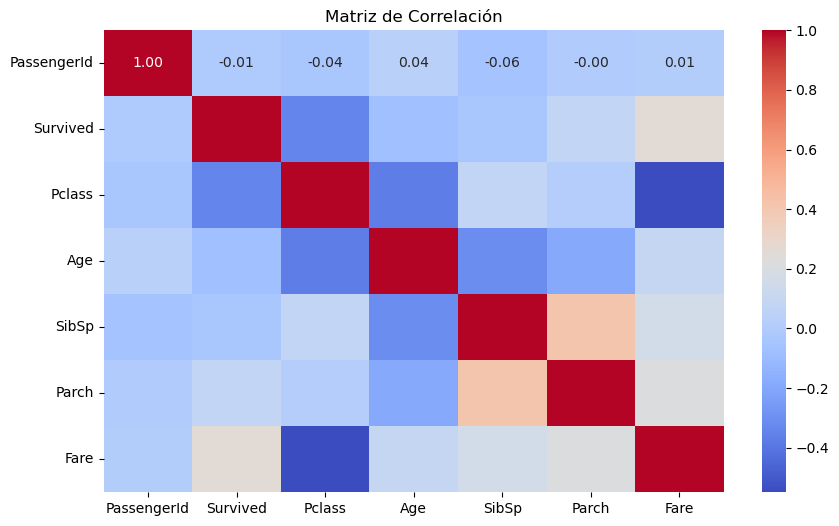

In [110]:
# Matriz de correlación
correlation_matrix = train_data.corr(numeric_only=True)

# Visualización de la matriz de correlación en un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Análisis de los atributos del target:

c:\Users\adria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


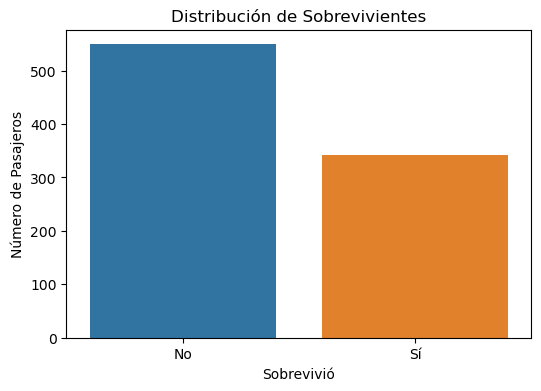

Porcentaje de pasajeros que sobrevivieron:
Survived
0    61.616162
1    38.383838
Name: count, dtype: float64


In [111]:
# Conteo de valores únicos en la columna "Survived" (atributo del target)
survival_counts = train_data["Survived"].value_counts()

# Gráfico de barras para visualizar la distribución de sobrevivientes
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=train_data)
plt.xlabel("Sobrevivió")
plt.ylabel("Número de Pasajeros")
plt.title("Distribución de Sobrevivientes")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

# Porcentaje de pasajeros que sobrevivieron
survival_percentage = survival_counts / len(train_data) * 100
print("Porcentaje de pasajeros que sobrevivieron:")
print(survival_percentage)


### 2. Preprocessing (normalitzation, outlier removal, feature selection..) (2 punts)

**Preguntas:**

In [112]:
train_data = pd.read_csv("titanic/train.csv")

In [113]:
train_data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


* ¿Están las datos normalizados? ¿Sería necesario normalizarlos?

Los datos no están normalizados, ya que la escala de valores que toman, por ejemplo, "Age" y "Fare" son completamente distintas. Por ello es necesario aplicar una técnica de normalización para poder probar tanto modelos sensibles a la escala de los datos como los que no se ven afectados.

* En caso de normalización, ¿qué tipo de normalización es más adecuada?

La normalización Z-Score (StandardScaler) sería una buena opción si nuestros datos siguen una distribución normal. Pero por lo que hemos podido comprobar no es el caso para todos los atributos, así que optaremos por una normalización Min-Max, que escala los datos al rango [0, 1] y puede ser útil si hay datos con valores atípicos.  

* ¿Tienes muchos valores faltantes (NaN)? Tened en cuenta que hay métodos que no los toleran durante el aprendizaje. ¿Cómo afectan a la clasificación? Y si los rellenáis, ¿cómo lo haríais?

Sí, en nuestros datos hay nulos en "Age", "Cabin" y "Embarked".  
 
* Como hay muchos nulos en "Cabin" (687 de 891 entradas), hemos decidido que eliminaremos esta columna.  
* Para "Age" y "Embarked", extraeremos los valores faltantes utilizando la media en función de la clase de pasajero para "Age" y eliminando las filas con valores faltantes en "Embarked".  

* ¿Tienes datos categóricos? ¿Cómo se deben codificar?

Sí, tenemos datos categóricos en las columnas "Embarked", "Sex", "Cabin", "Ticket" y "Name".

Podemos utilizar la codificación one-hot (dummy encoding) para convertir estas columnas en columnas binarias para cada categoría de los datos.  

Esto asegurará que el modelo pueda trabajar con estos datos categóricos.

* ¿Podréis extraer algún atributo adicional de los datos categóricos (por ejemplo, aplicando alguna regla sobre el texto)?

En nuestro caso, se podría extraer algún atributo adicional de Ticket, clasificando los que tienen únicamente valores numéricos o los que tienen también texto, sin embargo no vemos que el atributo Ticket tenga mucha relevancia en este conjunto de datos.  

* ¿Es necesario aplicar PCA? ¿Qué beneficios o inconvenientes encuentraríais?

Dado que nuestro conjunto de datos no tiene muchas dimensiones desde el inicio, no es necesario aplicar PCA.  

La reducción de dimensionalidad podría llevar a una pérdida de información, por lo que para usarla hay que evaluar si el beneficio de reducir el número de dimensiones supera la pérdida de información que eso conlleva.

* ¿Es necesario aplicar alguna técnica de selección de características? ¿Lo veis necesario?

No vemos necesario aplicar técnicas de selección de características ya que de base tenemos pocas. Sin embargo, eso no implica que eliminemos algunas por abundancia de nulos, como "Cabin", o por poca relevancia en sobre el target, como "PassengerId" que no es más que un identificador.  

* ¿Se pueden aplicar PolynomialFeatures para mejorar la clasificación? ¿En qué modelos tiene sentido hacerlo?

PolynomialFeatures se utiliza para generar características polinómicas a partir de las características existentes. Puede ser útil en modelos lineales y algunos algoritmos de regresión para capturar relaciones no lineales entre las características. No suele ser necesario en modelos como árboles de decisión o Random Forest, que pueden manejar relaciones no lineales sin necesidad de esta transformación.

**Información General:**

In [114]:
train_data = pd.read_csv("titanic/train.csv")

Eliminación de nans

In [115]:
# Calcular la edad media por clase social
age_class_means = train_data.groupby('Pclass')['Age'].mean()

# Función para rellenar los NaN en 'Age' con la media correspondiente a la 'Pclass'
def impute_age(row):
    if pd.isnull(row['Age']):
        return age_class_means[row['Pclass']]
    return row['Age']

train_data['Age'] = train_data.apply(impute_age, axis=1)

# Descartar la columna "Cabin" debido a la gran cantidad de valores faltantes.
# Descartar las columnas "PassengerId", "Name" y "Ticket" debido a su poca relevancia.
train_data.drop(['Cabin','PassengerId','Name','Ticket'], axis=1, inplace=True)

# Descartar las filas con NaN en la columna "Embarked".
train_data.dropna(subset=['Embarked'], inplace=True)

In [116]:
null_counts = train_data.isnull().sum()
print("Número de valores nulos por atributo:")
print(null_counts)

train_data.head(n=10)

Número de valores nulos por atributo:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00000,1,0,7.2500,S
1,1,1,female,38.00000,1,0,71.2833,C
2,1,3,female,26.00000,0,0,7.9250,S
3,1,1,female,35.00000,1,0,53.1000,S
4,0,3,male,35.00000,0,0,8.0500,S
5,0,3,male,25.14062,0,0,8.4583,Q
6,0,1,male,54.00000,0,0,51.8625,S
7,0,3,male,2.00000,3,1,21.0750,S
8,1,3,female,27.00000,0,2,11.1333,S
9,1,2,female,14.00000,1,0,30.0708,C


Encoding de categóricas

In [117]:
# Convertimos cada categoría de un atributo en una columna binaria (0 o 1)
train_data = pd.get_dummies(train_data, columns=["Sex", "Embarked"])

# male(1) y female(0)
# train_data.Sex = pd.Categorical(train_data.Sex)
# train_data.Sex = train_data.Sex.cat.codes

# C(0), Q(1) y S(2)
# train_data.Embarked = pd.Categorical(train_data.Embarked)
# train_data.Embarked = train_data.Embarked.cat.codes

train_data.head(n=10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.00000,1,0,7.2500,False,True,False,False,True
1,1,1,38.00000,1,0,71.2833,True,False,True,False,False
2,1,3,26.00000,0,0,7.9250,True,False,False,False,True
3,1,1,35.00000,1,0,53.1000,True,False,False,False,True
4,0,3,35.00000,0,0,8.0500,False,True,False,False,True
5,0,3,25.14062,0,0,8.4583,False,True,False,True,False
6,0,1,54.00000,0,0,51.8625,False,True,False,False,True
7,0,3,2.00000,3,1,21.0750,False,True,False,False,True
8,1,3,27.00000,0,2,11.1333,True,False,False,False,True
9,1,2,14.00000,1,0,30.0708,True,False,True,False,False


Otros (PCA, normalización..)

In [118]:
# Crear un objeto de escala
scaler = MinMaxScaler()

# Ajustar y transformar las características numéricas
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])

train_data.head(n=10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0.271174,1,0,0.014151,False,True,False,False,True
1,1,1,0.472229,1,0,0.139136,True,False,True,False,False
2,1,3,0.321438,0,0,0.015469,True,False,False,False,True
3,1,1,0.434531,1,0,0.103644,True,False,False,False,True
4,0,3,0.434531,0,0,0.015713,False,True,False,False,True
5,0,3,0.310639,0,0,0.016510,False,True,False,True,False
6,0,1,0.673285,0,0,0.101229,False,True,False,False,True
7,0,3,0.019854,3,1,0.041136,False,True,False,False,True
8,1,3,0.334004,0,2,0.021731,True,False,False,False,True
9,1,2,0.170646,1,0,0.058694,True,False,True,False,False


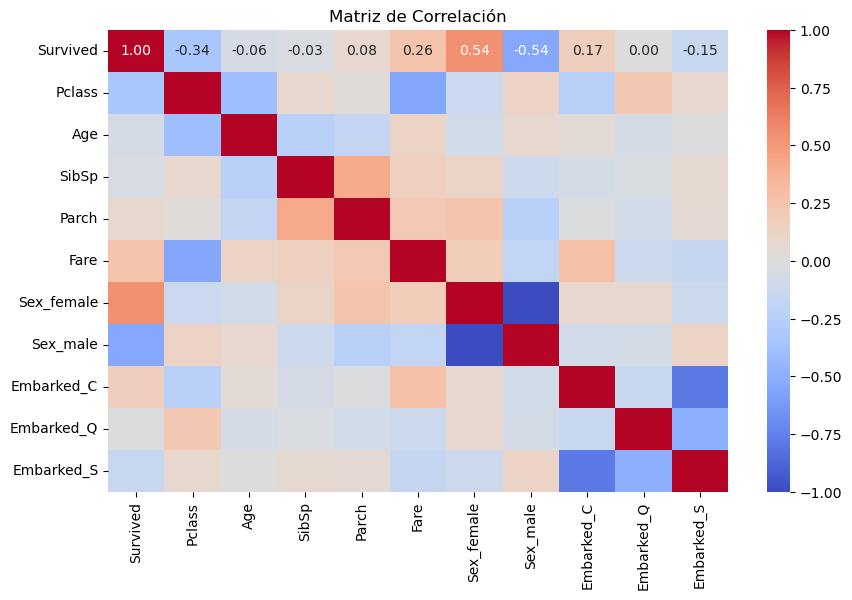

In [119]:
# Matriz de correlación
correlation_matrix = train_data.corr(numeric_only=True)

# Visualización de la matriz de correlación en un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [120]:
# Ordenar la correlación con respecto a "Survived"
correlation_with_target = correlation_matrix["Survived"].sort_values(ascending=False)

# Mostrar la correlación con "Survived"
print("Correlación con Survived:")
print(correlation_with_target)

Correlación con Survived:
Survived      1.000000
Sex_female    0.541585
Fare          0.255290
Embarked_C    0.169966
Parch         0.083151
Embarked_Q    0.004536
SibSp        -0.034040
Age          -0.055278
Embarked_S   -0.151777
Pclass       -0.335549
Sex_male     -0.541585
Name: Survived, dtype: float64


Observaciones:  

* El género parece haber influido en la posibilidad de sobrevivir de cada pasajero, posiblemente por el protocolo social de priorizar a mujeres y niños en este tipo de situaciones.  

* Lo siguiente que más ha influido parece ser la clase del pasajero, y esto se ve reflejado en la correlación que tienen tanto "Pclass" como "Fare".  

* A partir de este punto, el resto de correlaciones son más bajas exceptuando las de puerto de embarque, en las que se llega a una correlación de 0.17 con "Survived" en el caso de la gente que embarcó en  Cherbourg y un -0.15 la que embarcó en Southampton.  

Como dijimos en otra pregunta anterior, estas conclusiones aunque sea a las que hemos llegado mediante los resultados de análisis obtenidos, no son fiables ya que se basan además en otras suposiciones y se excluyen variables externas que no conocemos. Sin embargo, sí que ayuda la matriz de correlación a identificar aquellos atributos que más importancia tienen sobre el target dentro del conjunto de atributos que disponemos.  

In [121]:
# Este es un PCA momentáneo y no influye en la preparación del modelo que haremos
# Aun así queríamos ver cómo se realizaba un PCA con sklearn y los resultados que se obtenían

# Crear un objeto de PCA
pca = PCA(n_components=2)  # Define el número de componentes principales deseados

# Aplicar PCA a las características normalizadas
principal_components = pca.fit_transform(train_data[['Age', 'Fare']])

# Agregar los componentes principales de vuelta al DataFrame si es necesario
train_data['PCA1'] = principal_components[:, 0]
train_data['PCA2'] = principal_components[:, 1]

train_data.head(n=10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,PCA1,PCA2
0,0,3,0.271174,1,0,0.014151,False,True,False,False,True,-0.095591,-0.038803
1,1,1,0.472229,1,0,0.139136,True,False,True,False,False,0.117331,0.064680
2,1,3,0.321438,0,0,0.015469,True,False,False,False,True,-0.045461,-0.042700
3,1,1,0.434531,1,0,0.103644,True,False,False,False,True,0.076159,0.033285
4,0,3,0.434531,0,0,0.015713,False,True,False,False,True,0.067049,-0.054174
5,0,3,0.310639,0,0,0.016510,False,True,False,True,False,-0.056094,-0.040546
6,0,1,0.673285,0,0,0.101229,False,True,False,False,True,0.313378,0.006147
7,0,3,0.019854,3,1,0.041136,False,True,False,False,True,-0.342763,0.014073
8,1,3,0.334004,0,2,0.021731,True,False,False,False,True,-0.032314,-0.037773
9,1,2,0.170646,1,0,0.058694,True,False,True,False,False,-0.190963,0.015915


In [122]:
# Eliminamos los PCA porque no los utilizaremos
train_data.drop(['PCA1', 'PCA2'], axis=1, inplace=True)

### 3. Metric selection (1.5 punts)

**Preguntas:**

* ¿Podríais explicar y justificar cuál de las siguientes métricas será la más adecuada para vuestro problema? `accuracy_score`, `f1_score` o `average_precision_score`?

1. Accuracy (exactitud): La exactitud mide el porcentaje de predicciones correctas en general, pero en un conjunto de datos desequilibrado como este, puede ser engañosa por la diferencia entre las clases de sobrevivientes y no sobrevivientes.

2. F1-Score: El F1-Score combina precisión y sensibilidad, lo que lo hace relevante cuando queremos un equilibrio entre ambas métricas.

3. Average Precision Score (Puntuación de precisión promedio): Si nos interesa evaluar la precisión de nuestras predicciones en diferentes umbrales de decisión, la puntuación de precisión promedio puede ser útil.

La elección depende de nuestros objetivos, pero en este caso consideramos que es mejor buscar un equilibrio entre precisión y sensibilidad, por lo que el F1-Score es el más adecuado.

* Mostrad la `precision_recall_curve` y la `roc_curve`. ¿Cuál es más relevante para vuestro dataset? Explicad con vuestras palabras, la diferencia entre una y otra.

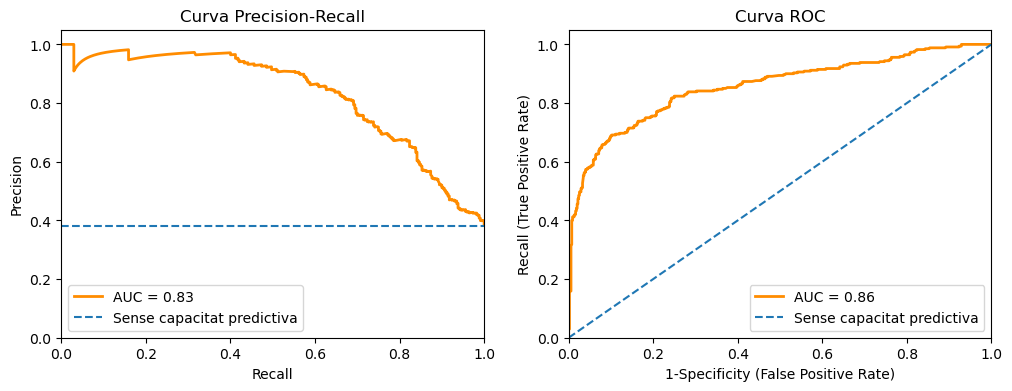

In [123]:
# Dividir los datos en características (X) y etiquetas (y)
# Como no es únicamente para mostrar esas dos curvas, no haremos la separación entre train y test,
# esta se hará en el apartado 4 cuando empecemos a entrenar modelos que aplicar
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Generar una predicción sin habilidad (clase mayoritaria)
ns_probs = [0 for _ in range(len(y))]

# Calcular la probabilidad de predicción
y_pred_prob = model.predict_proba(X)[:, 1]

# Calcula la curva Precision-Recall (PRC)
precision, recall, thresholds = precision_recall_curve(y, y_pred_prob)

# Calcula el área bajo la curva Precision-Recall (AUC-PRC)
auc_prc = auc(recall, precision)

# Calcula la curva ROC y el área bajo la curva ROC (AUC-ROC)
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
auc_roc = auc(fpr, tpr)

# Visualiza la curva PRC
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='darkorange', lw=2, label=f'AUC = {auc_prc:.2f}')
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sense capacitat predictiva')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')

# Visualiza la curva ROC
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_roc:.2f}')
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sense capacitat predictiva')
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Recall (True Positive Rate)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva ROC')
plt.legend(loc='lower right')

plt.show()

1. Precision-Recall Curve: La PRC muestra cómo cambia el rendimiento del modelo a medida que variamos el umbral de decisión, centrándose en las predicciones positivas.  
Es fundamental en problemas de desequilibrio de clases para comprender cómo el modelo predice correctamente las muestras positivas.

2. ROC Curve: La ROC muestra la relación entre la tasa de verdaderos positivos (Recall) y la tasa de falsos positivos (1-Specificity) a medida que variamos el umbral de decisión.  
Es útil para evaluar la capacidad de discriminación del modelo y su capacidad para distinguir entre clases positivas y negativa

En nuestro caso, la PRC es más relevante, ya que tenemos un dataset desbalanceado. Además, muestra a la perfección la relación entre Precision y Recall, que son las dos métricas que engloba el F1-Score que hemos seleccionado.

La principal diferencia entre estas dos curvas es que la PRC se centra en las predicciones positivas, mientras que la ROC se centra en la tasa de falsos positivos. 

* ¿Qué muestra `classification_report`? ¿Qué métrica os fijaríais para optimizar su clasificación para vuestro caso?

El `classification_report` proporciona un informe detallado de las métricas de clasificación, incluyendo precisión, sensibilidad, F1-Score y soporte (número de ejemplos) para cada clase.  
Es una herramienta valiosa para evaluar el rendimiento del modelo en cada clase.  

En nuestro caso, como hemos escogido el F1-Score como métrica, nos fijaremos en esa pero también en la precisión y la sensibilidad, que están relacionadas con nuestra métrica.  

In [124]:
# Realizar predicciones en los mismos datos (esto es solo para propósitos demostrativos)
y_pred = model.predict(X)

# Genera el classification_report
report = classification_report(y, y_pred)

# Imprime el informe
print(report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       340

    accuracy                           0.80       889
   macro avg       0.79      0.78      0.78       889
weighted avg       0.80      0.80      0.80       889



**Información General:**

Selección de la mejor métrica para el problema

En nuestro caso, analizamos las distintas métricas disponibles para ver en cuál nos fijamos:  

* Exactitud (Accuracy): Esta métrica mide la proporción de predicciones correctas en general.  
Es útil como métrica general de rendimiento, pero no es la más fiable si se quiere priorizar identificar una clase u otra y sobre todo si los datos están desbalanceados.

* Precisión (Precision): La precisión se centra en la proporción de predicciones positivas correctas entre todas las predicciones positivas.  
Es útil si queremos minimizar los falsos positivos.

* Sensibilidad (Recall): La sensibilidad se enfoca en la proporción de verdaderos positivos entre todos los ejemplos positivos en nuestros datos.  
Es útil si deseamos minimizar los falsos negativos.

* Especificidad (Specificity): Se refiere a la proporción de verdaderos negativos entre todos los ejemplos negativos.  
Es útil para minimizar los falsos positivos.

* F1-Score: Esta métrica combina precisión y sensibilidad.  
Es útil cuando necesitamos encontrar un equilibrio entre ambas.

En nuestro caso, vemos importante tanto una buena precisión como un buen recall, por lo que optamos por el F1-Score.

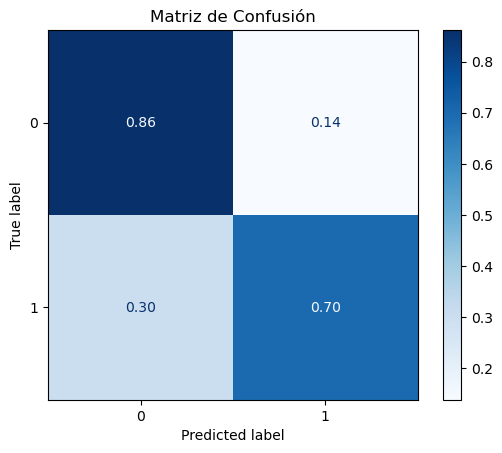

        Metric     Score
0     Accuracy  0.799775
1    Precision  0.757962
2       Recall  0.700000
3  Specificity  0.822609
4     F1-Score  0.727829


In [125]:
# Dividir los datos en características (X) y etiquetas (y)
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Realizar predicciones en los mismos datos (esto es solo para propósitos demostrativos)
y_pred = model.predict(X)

# Generar una matriz de confusión
conf_matrix = confusion_matrix(y, y_pred)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)

# Visualizar la matriz de confusión normalizada
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title('Matriz de Confusión')
plt.show()

# Calcular las métricas
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
specificity = precision_score(y, y_pred, pos_label=0)
f1 = f1_score(y, y_pred)

# Crear un DataFrame para almacenar las métricas
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score'],
    'Score': [accuracy, precision, recall, specificity, f1]
})

# Mostrar la tabla de métricas
print(metrics_df)

Visualización de la curva ROC/AUC:

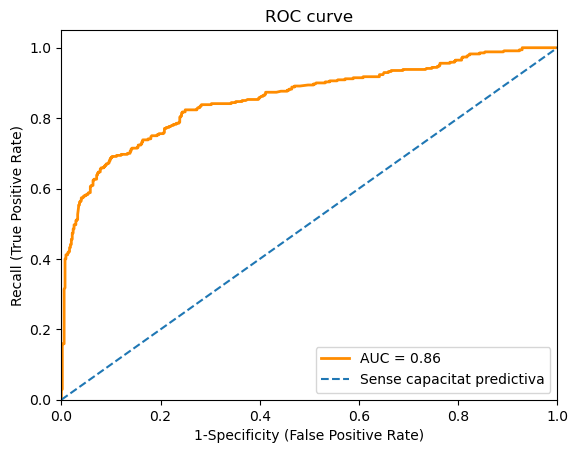

In [126]:
# Dividir los datos en características (X) y etiquetas (y)
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Generar una predicción sin habilidad (clase mayoritaria)
ns_probs = [0 for _ in range(len(y))]

# Calcular la probabilidad de predicción para la curva ROC
y_pred_prob = model.predict_proba(X)[:, 1]

# Calcula la curva ROC y el área bajo la curva ROC (AUC-ROC)
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
auc_roc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_roc:.2f}')
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sense capacitat predictiva')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Recall (True Positive Rate)')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

Visualización de la curva PRC/AUC:

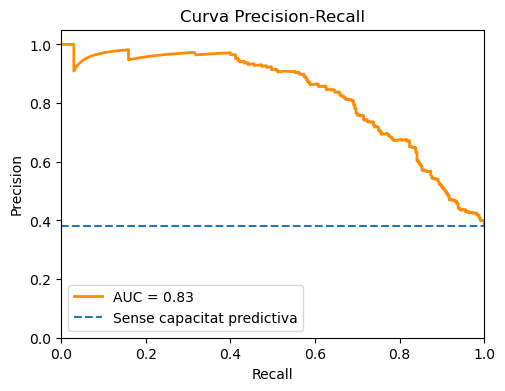

In [127]:
# Dividir los datos en características (X) y etiquetas (y)
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Generar una predicción sin habilidad (clase mayoritaria)
ns_probs = [0 for _ in range(len(y))]

# Calcular la probabilidad de predicción
y_pred_prob = model.predict_proba(X)[:, 1]

# Calcula la curva Precision-Recall (PRC)
precision, recall, thresholds = precision_recall_curve(y, y_pred_prob)

# Calcula el área bajo la curva Precision-Recall (AUC-PRC)
auc_prc = auc(recall, precision)

# Visualiza la curva PRC
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='darkorange', lw=2, label=f'AUC = {auc_prc:.2f}')
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sense capacitat predictiva')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')

plt.show()

### 4. Model Selection amb validacio creuada (4 punts)

* Selección de Modelos:

En este caso, hemos considerado los siguientes modelos:

1. Regresión Logística: La regresión logística es buena opción para problemas de clasificación binaria. La hemos seleccionado porque es un modelo simple y fácil de interpretar, lo que lo hace útil como punto de referencia.  

2. Random Forest: El Random Forest es un conjunto de árboles de decisión, que son excelentes para problemas de clasificación y regresión. Lo hemos considerado como ejemplo de ensemble.  

3. K-Nearest Neighbors (KNN): KNN es un modelo de aprendizaje supervisado basado en instancias que calcula la similitud entre puntos de datos para hacer predicciones. Lo hemos incluido porque puede ser efectivo en problemas de clasificación con estructuras de datos complejas.  

4. Máquinas de Soporte Vectorial (SVM): SVM es una técnica poderosa para la clasificación y regresión. La hemos elegido debido a su capacidad para manejar problemas de clasificación lineales y no lineales mediante el uso de diferentes kernels.  

* Validación Cruzada (Cross-Validation):

La validación cruzada es importante para evaluar el modelo en función de la métrica seleccionada y obtener un resultado cercano al real gracias a usar diversas validaciones y calcular la media de todos los rendimientos.

Hay diversos métodos de validación cruzada, pero para nuestro caso descartaremos Leave One Out por su alta complejidad computacional y nos quedaremos con un Stratified K-Fold de 10 folds para tener una amplia muestra de rendimiento con conjuntos de datos bien representativos de los atributos.

In [128]:
# Crear una lista de modelos
models = [
    ('Logistic Regression', LogisticRegression()),
    ("Bosque Aleatorio", RandomForestClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC())
]

results = []
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Realizar la validación cruzada para cada modelo
for name, model in models:

    scores = cross_val_score(model, X, y, cv=kfold, scoring='f1')

    mean_score = scores.mean()
    
    results.append([name, mean_score])

# Crear un DataFrame para mostrar los resultados en una tabla
results_df = pd.DataFrame(results, columns=['Modelo', 'F1-Score'])

results_df

,Modelo,F1-Score
0,Logistic Regression,0.727364
1,Bosque Aleatorio,0.746643
2,K-Nearest Neighbors,0.712042
3,Support Vector Machine,0.721995


* Búsqueda de Hiperparámetros y Resultados en una Tabla:

Para encontrar los mejores hiperparámetros hay diversas técnicas como por ejemplo:  

1. Búsqueda en Cuadrícula (Grid Search): Esta técnica explora todas las combinaciones de hiperparámetros introducidos usando una validación cruzada y devuelve el conjunto de hiperparámetros que mejor ha funcionado. Su coste computacional es alto pero devuelve el mejor resultado de entre los hiperparámetros proporcionados.  

2. Búsqueda Aleatoria (Randomized Search): Esta técnica hace pruebas escogiendo hiperparámetros aleatorios que se han proporcionado y se queda con los hiperparámetros que mejor funcionan aunque no sea en esa combinación concreta resultante. El resultado de este método no es necesariamente la mejor combinación de hiperparámetros introducidos, pero su coste computacional es menor que el Grid Search y permite mapear mejor el espacio de hiperparámetros.  

Por otra parte, también existen optimizaciones a la hora de buscar hiperparámetros, como es el caso de la Optimización Bayesiana, que consiste en lo mismo que el Grid Search pero utiliza técnicas de optimización basadas en modelos probabilísticos para encontrar los mejores hiperparámetros. Sin embargo, su mayor inconveniente es que resulta difícil de configurar a menos que se tenga experiencia, con lo que hemos decidido no usarla.  

En nuestro caso, como disponemos de tiempo y recursos computacionales suficientes para las búsquedas que pensamos hacer, aplicaremos ambas técnicas para encontrar los mejores hiperparámetros de cada modelo.  

In [129]:
# X son las características y y es la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Crear una lista de modelos a considerar
models = [
    ("Regresión Logística", LogisticRegression()),
    ("Bosque Aleatorio", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC()),
]

results = []

# Para desactivar un tipo específico de warning
warnings.filterwarnings("ignore")

# Realizar la selección de modelos y búsqueda de hiperparámetros
for model_name, model in models:

    # Realizar la búsqueda de hiperparámetros
    if model_name == "Regresión Logística":
        # Definir hiperparámetros a probar para Regresión Logística
        param_grid = {'penalty': ['l1', 'l2', 'none'], 'C': [0, 1, 2, 3, 4], 'solver': ['lbfgs', 'liblinear', 'sag', 'saga']}
        grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='f1')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    elif model_name == "Bosque Aleatorio":
        # Definir hiperparámetros a probar para Bosque Aleatorio
        param_grid = {'n_estimators': [100, 150, 200],'max_depth': [8, 9, 10], 'class_weight': [None, 'balanced'], 'max_features': ['auto', 'sqrt', 'log2']}
        grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='f1')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    elif model_name == "KNN":
        # Definir hiperparámetros a probar para KNN
        param_grid = {'n_neighbors': [1, 2, 3, 4], 'weights': ['uniform', 'distance'], 'p': [0, 1, 2, 3, 4]}
        grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='f1')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    elif model_name == "SVM":
        # Definir hiperparámetros a probar para SVM
        param_grid = {'C': [1, 4, 5, 6, 10], 'tol': [1.1, 1.01, 1, 0.1, 0.01], 'class_weight': [None, 'balanced']}
        grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='f1')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

    # Evaluar el mejor modelo en el conjunto de prueba con el test
    y_pred_test = best_model.predict(X_test)
    f1_test = f1_score(y_test, y_pred_test)

    results.append([model_name, grid_search.best_score_, f1_test, best_model.get_params(False)])
    #results.append([model_name, grid_search.best_score_, best_model])

# Para restaurar la configuración predeterminada de warnings
warnings.filterwarnings("default")

# Configura la opción de ancho de columna para que no se corte el texto
pd.set_option('display.max_colwidth', None)

# Crear un DataFrame para mostrar los resultados en una tabla
results_df = pd.DataFrame(results, columns=['Modelo', 'F1-Score (Train)', 'F1-Score (Test)', 'Hiperparámetros del Mejor Modelo'])
#results_df = pd.DataFrame(results, columns=['Modelo', 'F1-Score (Train)', 'Hiperparámetros del Mejor Modelo'])

results_df

,Modelo,F1-Score (Train),F1-Score (Test),Hiperparámetros del Mejor Modelo
0,Regresión Logística,0.724487,0.740157,"{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}"
1,Bosque Aleatorio,0.776038,0.732824,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}"
2,KNN,0.723384,0.692308,"{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}"
3,SVM,0.775756,0.705036,"{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 1, 'verbose': False}"


In [130]:
# X son las características y y es la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Crear una lista de modelos a considerar
models = [
    ("Regresión Logística", LogisticRegression()),
    ("Bosque Aleatorio", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC()),
]

results = []

# Para desactivar un tipo específico de warning
warnings.filterwarnings("ignore")

# Realizar la selección de modelos y búsqueda de hiperparámetros
for model_name, model in models:

    # Realizar la búsqueda de hiperparámetros
    if model_name == "Regresión Logística":
        # Definir hiperparámetros a probar para Regresión Logística
        param_grid = {'penalty': ['l1', 'l2', 'none'], 'C': [0, 1, 2, 3, 4], 'solver': ['lbfgs', 'liblinear', 'sag', 'saga']}
        grid_search = RandomizedSearchCV(model, param_grid, cv=kfold, scoring='f1')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    elif model_name == "Bosque Aleatorio":
        # Definir hiperparámetros a probar para Bosque Aleatorio
        param_grid = {'n_estimators': [100, 150, 200],'max_depth': [8, 9, 10], 'class_weight': [None, 'balanced'], 'max_features': ['auto', 'sqrt', 'log2']}
        grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='f1')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    elif model_name == "KNN":
        # Definir hiperparámetros a probar para KNN
        param_grid = {'n_neighbors': [1, 2, 3, 4], 'weights': ['uniform', 'distance'], 'p': [0, 1, 2, 3, 4]}
        grid_search = RandomizedSearchCV(model, param_grid, cv=kfold, scoring='f1')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    elif model_name == "SVM":
        # Definir hiperparámetros a probar para SVM
        param_grid = {'C': [1, 4, 5, 6, 10], 'tol': [1.1, 1.01, 1, 0.1, 0.01], 'class_weight': [None, 'balanced']}
        grid_search = RandomizedSearchCV(model, param_grid, cv=kfold, scoring='f1')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

    # Evaluar el mejor modelo en el conjunto de prueba con el test
    y_pred_test = best_model.predict(X_test)
    f1_test = f1_score(y_test, y_pred_test)

    results.append([model_name, grid_search.best_score_, f1_test, best_model.get_params(False)])
    #results.append([model_name, grid_search.best_score_, best_model])

# Para restaurar la configuración predeterminada de warnings
warnings.filterwarnings("default")

# Configura la opción de ancho de columna para que no se corte el texto
pd.set_option('display.max_colwidth', None)

# Crear un DataFrame para mostrar los resultados en una tabla
results_df = pd.DataFrame(results, columns=['Modelo', 'F1-Score (Train)', 'F1-Score (Test)', 'Hiperparámetros del Mejor Modelo'])
#results_df = pd.DataFrame(results, columns=['Modelo', 'F1-Score (Train)', 'Hiperparámetros del Mejor Modelo'])

results_df

,Modelo,F1-Score (Train),F1-Score (Test),Hiperparámetros del Mejor Modelo
0,Regresión Logística,0.723171,0.740157,"{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}"
1,Bosque Aleatorio,0.768823,0.753846,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}"
2,KNN,0.720835,0.692308,"{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}"
3,SVM,0.773503,0.700000,"{'C': 6, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 1.01, 'verbose': False}"


Random Forest tiene un F1-Score más alto en el entrenamiento, seguido muy de cerca por las SVM. Por lo tanto nos quedamos con el Random Forest como modelo final.  
Aunque mostremos los datos sobre el test porque se pedía en la práctica, no hemos usado esa información para escoger el modelo final.  

### 5.Analisi Final (1.5 punt)  

Una vez seleccionado el mejor modelo con los mejores hiperparámetros, habrá que hacer un reporte final con los resultados obtenidos.  

Preguntes:  

In [131]:
# X son las características y y es la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Crear una lista de modelos a considerar
model = RandomForestClassifier(n_estimators=150, max_depth=8, class_weight='balanced', max_features='sqrt')

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')

f1_train = scores.mean()

model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
f1_test = f1_score(y_test, y_pred_test)

print(f'F1-Score (Train): {f1_train:.5f}')
print(f'F1-Score (Test): {f1_test:.5f}')

F1-Score (Train): 0.76488
F1-Score (Test): 0.75556


* Mostrad las curvas PR e interpretad los resultados.

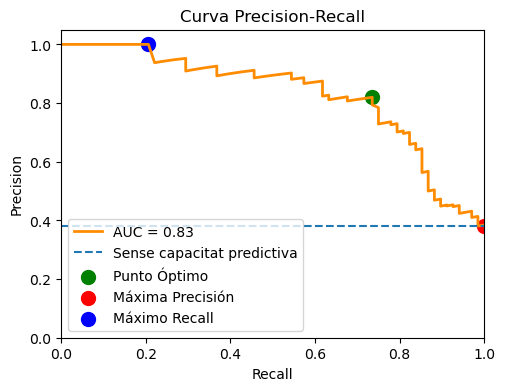

Punto Óptimo - Threshold: 0.53, Precision: 0.82, Recall: 0.74
Máxima Precisión cuando Recall=1: Precision: 0.38, Recall: 1.00
Máximo Recall cuando Precisión=1: Precision: 1.00, Recall: 0.21


In [132]:
# Generar una predicción sin habilidad (clase mayoritaria)
ns_probs = [0 for _ in range(len(y))]

# Calcular la probabilidad de predicción
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcula la curva Precision-Recall (PRC)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calcula el área bajo la curva Precision-Recall (AUC-PRC)
auc_prc = auc(recall, precision)

# Encuentra el punto óptimo (máximo F1-score)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold_index = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_precision = precision[optimal_threshold_index]
optimal_recall = recall[optimal_threshold_index]

# Encuentra el índice donde el recall es máxima
max_recall_index = np.argmax(recall)
# Encuentra el índice donde la precisión es máxima
max_precision_index = np.argmax(precision)
# Obtiene el valor de máxima precisión cuando el recall es máxima
max_precision_at_recall_max = precision[max_recall_index]
# Obtiene el valor de recall máximo cuando la precisión es máxima
max_recall_at_precision_max = recall[max_precision_index]

# Gráfica de la curva PRC con puntos de interes
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='darkorange', lw=2, label=f'AUC = {auc_prc:.2f}')
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sense capacitat predictiva')
plt.scatter(optimal_recall, optimal_precision, c='green', marker='o', s=100, label='Punto Óptimo')
plt.scatter(recall[max_recall_index], max_precision_at_recall_max, c='red', marker='o', s=100, label=f'Máxima Precisión')
plt.scatter(max_recall_at_precision_max, precision[max_precision_index], c='blue', marker='o', s=100, label=f'Máximo Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.show()

# Imprime los valores de interés
print(f"Punto Óptimo - Threshold: {optimal_threshold:.2f}, Precision: {optimal_precision:.2f}, Recall: {optimal_recall:.2f}")
print(f"Máxima Precisión cuando Recall=1: Precision: {max_precision_at_recall_max:.2f}, Recall: {recall[max_recall_index]:.2f}")
print(f"Máximo Recall cuando Precisión=1: Precision: {precision[max_precision_index]:.2f}, Recall: {max_recall_at_precision_max:.2f}")

1. Punto Óptimo (Threshold: 0.53, Precision: 0.82, Recall: 0.74): En este punto alcanzamos un equilibrio entre precisión y recall, por lo que es nuestro punto de interés al haber escogido como métrica el F1-Score. 

2. Máxima Precisión cuando Recall=1 (Precision: 0.38, Recall: 1.00): En este caso, el modelo está configurado para identificar todos los casos positivos (recall de 1.00), pero la precisión es baja, solo del 38%. Esto significa que el modelo clasifica muchos falsos positivos, pero es una buena referencia.

3. Máximo Recall cuando Precisión=1 (Precision: 1.00, Recall: 0.21): Aquí, el modelo tiene una precisión perfecta (1.00), lo que significa que todas sus predicciones positivas son correctas. Sin embargo, el recall es bajo, solo del 21% , lo que indica que el modelo deja pasar la mayoría de los casos positivos. Al igual que con recall máxima, sirve como punto de referencia.

* Analizad en detalle las diferentes métricas que encontréis adecuadas y comentad por encima cómo podríais utilizar este modelo en un futuro. Esto es lo que se conoce como un caso de uso.

Encontramos diferentes aplicaciones en función de la métrica escogida, nosotros consideraremos tres como las más relevantes para este dataset:  

1. F1-Score: Priorizando el F1-Score y maximizando la relación entre precision y recall (como es nuestro caso), podemos aplicar este modelo para la asignación de recursos para rescate en un accidente similar al del Titanic. También otro uso sería el permitir pasar al barco a ciertas personas en función de la predicción resultante para intentar obtener la menor cantidad de víctimas pero aun así dejando subir a gente en el barco. Sin embargo, para este último caso es posible que el modelo no de unos resultados tan buenos debido a la discriminación que se produciría a la hora de permitir el acceso a la gente en función del género o la clase del pasajero y también por posibles causas externas que quizá tengan más relación con la supervivencia que los atributos de los que disponemos.  

2. Recall: Esta métrica generaría un modelo muy útil para asignar recursos de rescate en un desastre de este tipo intentando priorizar que todos los que hayan sean rescatados a tiempo.  

3. Precision: Esta métrica generaría un modelo muy útil para priorizar la asignación de recursos de rescate a la gente con más probabilidades de sobrevivir. Serviría como primer paso para luego pasar a un modelo entrenado con el Recall para continuar la búsqueda de supervivientes.  

En resumen nuestro modelo es sobre todo aplicable para priorizar los rescates de personas que sepamos que tienen posibilidades de haber sobrevivido a un desastre similar al Titanic.